# Part I - Flights Data Exploration
## Thi My Hao PHAM

## Introduction
This document explores a dataset containing flights and attributes for approximately 7,500,000 flights.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_flights = pd.read_csv('2007.csv.bz2')

#Change data type
# Change type of column timestamp
df_flights.DepTime = pd.to_datetime(df_flights.DepTime, unit='s').dt.time
df_flights.CRSDepTime = pd.to_datetime(df_flights.CRSDepTime, unit='s').dt.time
df_flights.ArrTime = pd.to_datetime(df_flights.ArrTime, unit='s').dt.time
df_flights.CRSArrTime = pd.to_datetime(df_flights.CRSArrTime, unit='s').dt.time
df_flights.FlightNum = df_flights.FlightNum.astype('str')

#create actual time
df_flights['OccurrenceTime'] = df_flights.Year.astype('str') +'-'+  df_flights.Month.astype('str') +'-'+  df_flights.DayofMonth.astype('str')
df_flights.OccurrenceTime = pd.to_datetime(df_flights.OccurrenceTime)
#df_flights = df_flights.drop(columns= ["Year", "Month","DayofMonth"])

# high-level overview of data shape and composition
print(df_flights.shape)
print(df_flights.dtypes)
print(df_flights.head(10))

(7453215, 30)
Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime                      object
CRSDepTime                   object
ArrTime                      object
CRSArrTime                   object
UniqueCarrier                object
FlightNum                    object
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay 

### Enrich Manufacturer from plane-data

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df_planes = pd.read_csv('plane-data.csv')
df_planes = df_planes[df_planes.tailnum.notnull()]
dicts = {"tailnum":"TailNum", 
        "manufacturer":"Manufacturer", 
        "issue_date":"IssueDate"}
 
# call rename () method
df_planes = df_planes.rename(columns=dicts)
df_planes = df_planes[[ "TailNum","Manufacturer"]]
#df_planes.IssueDate = pd.to_datetime(df_planes.IssueDate)
print(df_planes.shape)
print(df_planes.dtypes)
print(df_planes.head(10))

(5029, 2)
TailNum         object
Manufacturer    object
dtype: object
  TailNum Manufacturer
0  N050AA          NaN
1  N051AA          NaN
2  N052AA          NaN
3  N054AA          NaN
4  N055AA          NaN
5  N056AA          NaN
6  N057AA          NaN
7  N058AA          NaN
8  N059AA          NaN
9  N060AA          NaN


In [4]:
#Enrich Manufacturer to data
df_flights = pd.merge(df_flights, df_planes, how='left', on='TailNum')

### Enrich CityOrigin and StateOrigin from airports

In [5]:
# load in the dataset into a pandas dataframe, print statistics
df_airports_origin = pd.read_csv('airports.csv')
df_airports_origin = df_airports_origin[df_airports_origin.iata.notnull()]
dicts = {"iata":"Origin", 
        "city":"CityOrigin",
        "state":"StateOrigin"}
 
# call rename () method
df_airports_origin = df_airports_origin.rename(columns=dicts)
df_airports_origin = df_airports_origin[[ "Origin","CityOrigin","StateOrigin"]]

print(df_airports_origin.shape)
print(df_airports_origin.dtypes)
print(df_airports_origin.head(10))

(3376, 3)
Origin         object
CityOrigin     object
StateOrigin    object
dtype: object
  Origin        CityOrigin StateOrigin
0    00M       Bay Springs          MS
1    00R        Livingston          TX
2    00V  Colorado Springs          CO
3    01G             Perry          NY
4    01J          Hilliard          FL
5    01M           Belmont          MS
6    02A           Clanton          AL
7    02C        Brookfield          WI
8    02G    East Liverpool          OH
9    03D           Memphis          MO


In [6]:
#Enrich City Origin to data
df_flights = pd.merge(df_flights, df_airports_origin, how='left', on='Origin')

### Enrich CityDest and StateDest from airports

In [7]:
# load in the dataset into a pandas dataframe, print statistics
df_airports_dest = pd.read_csv('airports.csv')
df_airports_dest = df_airports_dest[df_airports_dest.iata.notnull()]
dicts = {"iata":"Dest", 
        "city":"CityDest",
        "state":"StateDest"}
 
# call rename () method
df_airports_dest = df_airports_dest.rename(columns=dicts)
df_airports_dest = df_airports_dest[[ "Dest","CityDest","StateDest"]]

print(df_airports_dest.shape)
print(df_airports_dest.dtypes)
print(df_airports_dest.head(10))

(3376, 3)
Dest         object
CityDest     object
StateDest    object
dtype: object
  Dest          CityDest StateDest
0  00M       Bay Springs        MS
1  00R        Livingston        TX
2  00V  Colorado Springs        CO
3  01G             Perry        NY
4  01J          Hilliard        FL
5  01M           Belmont        MS
6  02A           Clanton        AL
7  02C        Brookfield        WI
8  02G    East Liverpool        OH
9  03D           Memphis        MO


In [8]:
#Enrich City Origin to data
df_flights = pd.merge(df_flights, df_airports_dest, how='left', on='Dest')

In [9]:
print(df_flights.shape)
print(df_flights.dtypes)
print(df_flights.head(10))
print(df_flights.describe())

(7453215, 35)
Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime                      object
CRSDepTime                   object
ArrTime                      object
CRSArrTime                   object
UniqueCarrier                object
FlightNum                    object
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay 

### What is the structure of your dataset?

There are 7453215 flights in the dataset with 32 features. The structure like below

![MarineGEO](Flight.PNG "")

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the delay, diverted or cancelation of flight. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that find most reason of cancelation flight, or time, city have the most of flight delay

## Exploration


In [10]:
#Function groupby
def Groupbycol(df, col):
    df.LateAircraftDelay.value_counts()

    df_flights_cityor = df.groupby([col]).sum()

    df_flights_cityor.index.values
    df_flights_cityor[col] =  df_flights_cityor.index.values
    return df_flights_cityor



#### I'll start by looking at the distribution of the main variable of interest: Flights Departure Delay Minutes


In [11]:
df_flights_de = df_flights[df_flights.DepDelay > 15]

### Chart 1: Distribution of Departure Delay

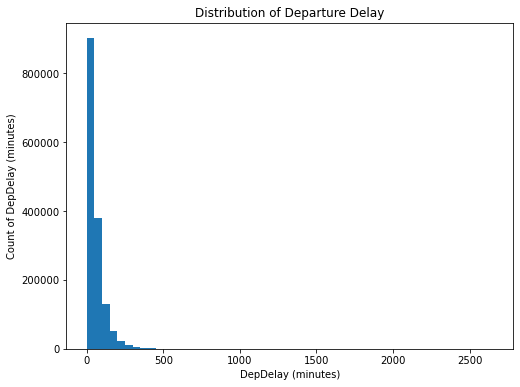

In [12]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(0, df_flights_de['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_flights_de, x = 'DepDelay', bins = bins)
plt.title('Distribution of Departure Delay')
plt.ylabel('Count of DepDelay (minutes)')
plt.xlabel('DepDelay (minutes)')
plt.show()

Observations: Most of Departure delay is less than 500 minutes

### Chart 2: Distribution of Departure Delay using the transformation

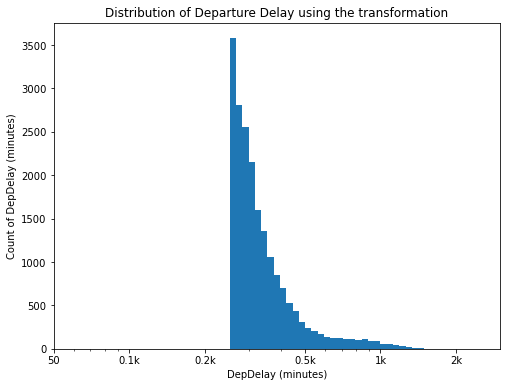

In [13]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_flights_de['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_flights_de, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([50, 1e2, 2e2, 5e2, 1e3, 2e3], [50, '0.1k', '0.2k', '0.5k', '1k', '2k'])
plt.title('Distribution of Departure Delay using the transformation')
plt.ylabel('Count of DepDelay (minutes)')
plt.xlabel('DepDelay (minutes)')
plt.show()

Observations: The Flights Minutes variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between  250 𝑎𝑛𝑑 300 

### Chart 3: Distribution of Year, Month and date of month

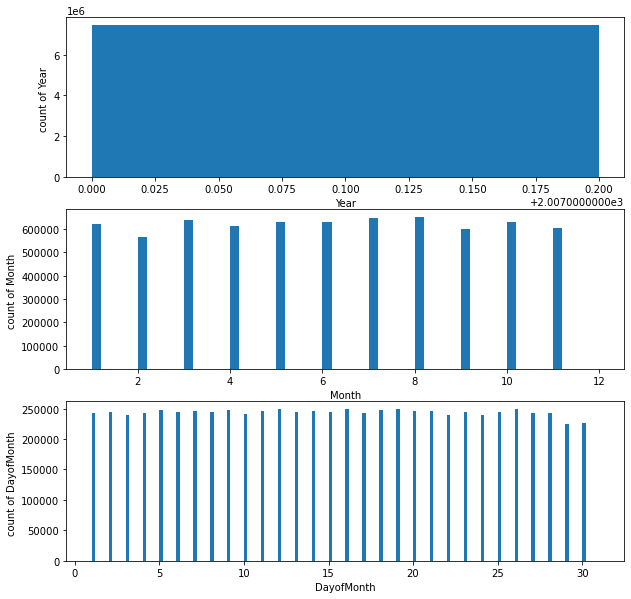

In [14]:
# let's start with the date of the df_flights, with Year', 'Month', 'DayofMonth'
fig, ax = plt.subplots(nrows=3, figsize = [10,10])

variables = ['Year', 'Month', 'DayofMonth']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_flights[var]), max(df_flights[var])+0.2, 0.2)
    ax[i].hist(data = df_flights, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('count of {} '.format(var))


plt.show()


Observations: The initial plot of the 'Year', 'Month', 'DayofMonth' features show good points. There are not any unusual distributions 

### Chart 4: Total distribution flights per month in 2007

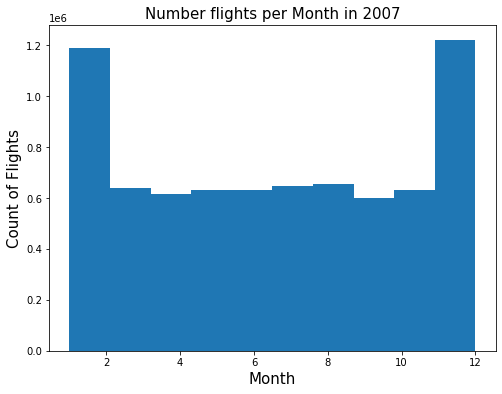

In [15]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.subplots(figsize=(8, 6))
plt.title("Number flights per Month in 2007", size=15)
#plt.text(i, count+300, count, ha = 'center', va='top')
plt.ylabel("Count of Flights", size=15);
plt.xlabel("Month", size=15);
plt.hist(data = df_flights, x = 'Month');

Observations:
+ Number of flights are hight in begining of year and in the end of year

### Chart 5:  Correlation between DepDelay vs ArrDelay, TaxiIn vs TaxiOut, ActualElapsedTime vs CRSElapsedTime

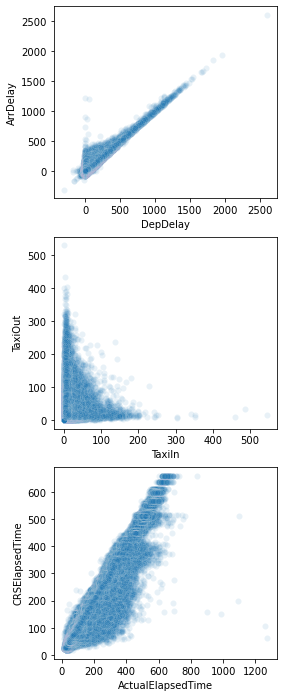

In [16]:
# scatter plot of DepDelay vs. ArrDelay, TaxiIn vs. TaxiOut, ActualElapsedTime vs. CRSElapsedTime
fig, ax = plt.subplots(nrows=3, figsize = [4,12])

sb.scatterplot(data = df_flights, x = 'DepDelay', y = 'ArrDelay', alpha = 1/10,ax = ax[0])
sb.scatterplot(data = df_flights, x = 'TaxiIn', y = 'TaxiOut', alpha = 1/10,ax = ax[1])
sb.scatterplot(data = df_flights, x = 'ActualElapsedTime', y = 'CRSElapsedTime', alpha = 1/10,ax = ax[2])

plt.show()

Observations:
+ Arrive delay increase and Departure delay increase also
+ TaxiIn and TaxiOut dont have obvious link
+ Schedule flight time approximate to actual flight time

### Chart 6: Total flight per Month, Manufacturer, Origin and Dest in 2007

In [17]:
#Function groupby
def Groupbycountplot(df, col):
    df.LateAircraftDelay.value_counts()

    df_flights_cityor = df.groupby([col]).count()

    df_flights_cityor.index.values
    df_flights_cityor[col] =  df_flights_cityor.index.values
    return df_flights_cityor


df_flights_month_countplot = Groupbycountplot(df_flights, "Month")
df_flights_nanufac_countplot = Groupbycountplot(df_flights, "Manufacturer")
df_flights_nanufac_countplot.sort_values("DepDelay", axis = 0, ascending = False, inplace = True)
df_flights_cityor_countplot = Groupbycountplot(df_flights, "CityOrigin")
df_flights_cityor_countplot.sort_values("DepDelay", axis = 0, ascending = False, inplace = True)
df_flights_stateor_countplot = Groupbycountplot(df_flights, "StateOrigin")
df_flights_stateor_countplot.sort_values("DepDelay", axis = 0, ascending = False, inplace = True)

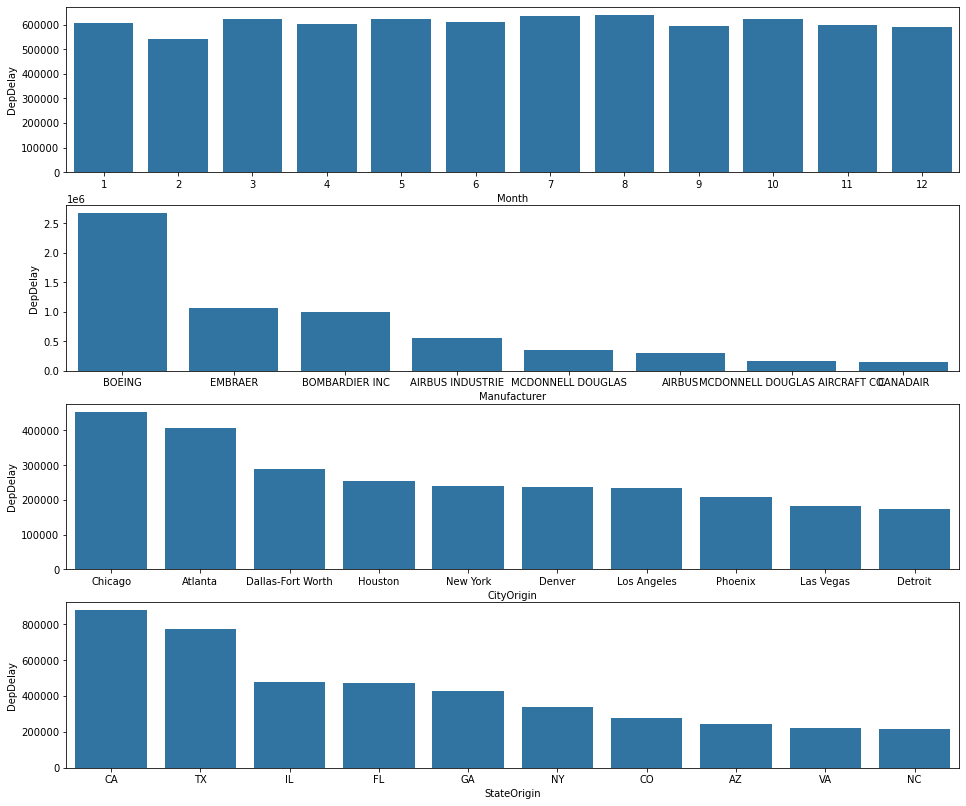

In [18]:
# let's plot all three together to get an idea of each variable's: Month, Manufacturer, Origin and Dest
fig, ax = plt.subplots(nrows=4, figsize = [16,14])

default_color = sb.color_palette()[0]
sb.barplot(data = df_flights_month_countplot, x = 'Month',y="DepDelay", color = default_color, ax = ax[0])
sb.barplot(data = df_flights_nanufac_countplot.head(8), x = 'Manufacturer',y="DepDelay", color = default_color, ax = ax[1])
sb.barplot(data = df_flights_cityor_countplot.head(10), x = 'CityOrigin',y="DepDelay", color = default_color, ax = ax[2])
sb.barplot(data = df_flights_stateor_countplot.head(10), x = 'StateOrigin',y="DepDelay", color = default_color, ax = ax[3])

plt.show()

Observations:
+ Number of flights are equal every month
+ Some Manufacturers have a large number of aircraft in operation: Boeing (>2,5e6 flights), Embraer (~1e6)
+ Some Citys have a large number of aircraft in operation: Chicago (>400,000 flights), Embraer (~400,000 flights)
+ Some Regions have a large number of aircraft in operation: CA (>800,000 flights), TX (~800,000 flights)

### Chart 7: Correlation of feature

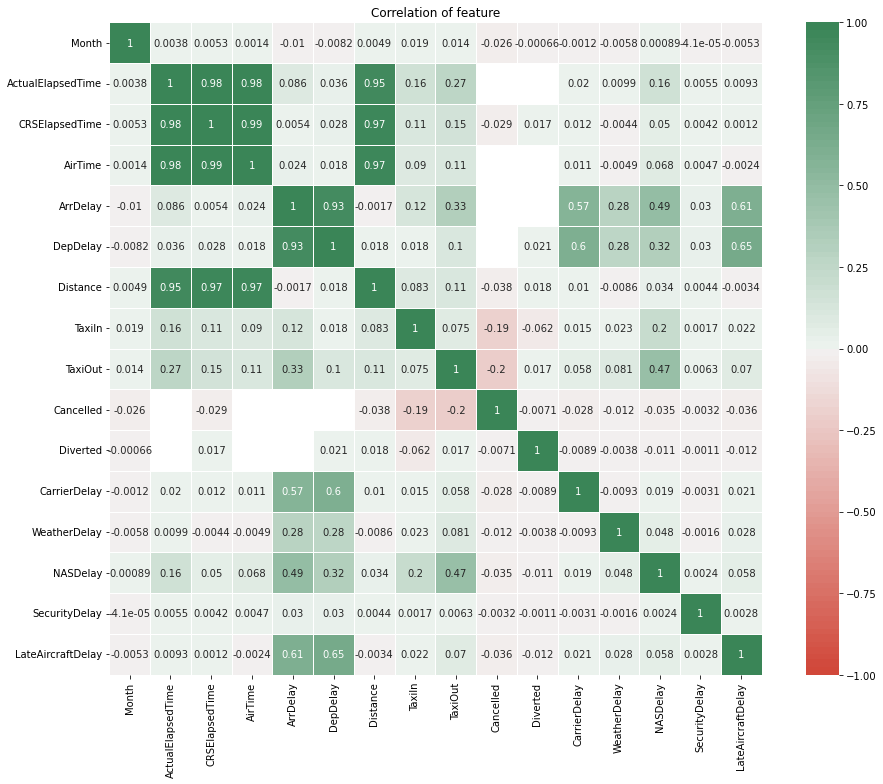

In [19]:
df_flights_map = df_flights.drop(columns= ["Year","DayofMonth", "DayOfWeek"])
# Draw the correlation matrix
fig, axes = plt.subplots(figsize=(16, 12))
plt.title('Correlation of feature')
corr = df_flights_map.corr()
axes = sb.heatmap(corr, annot=True, center=0, linewidths=1, square=True, cmap=sb.diverging_palette(15, 500, n = 100), vmin=-1, vmax=1)



Observations:
+ LateAircraftDelay, ArrDelay, DepDelay have hight positive correletion
+ AirTime, Distance have negative correlation


### Chart 8: Correlation between Departure Delay with other feature

In [20]:
numeric_vars1 = ["Month","ActualElapsedTime","ArrDelay","DepDelay","Distance","TaxiIn","TaxiOut"]

In [21]:
numeric_vars2 = ["DepDelay","Cancelled","Diverted","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]

diamonds.shape= (7453215, 32)
diamonds_samp.shape= (500, 32)


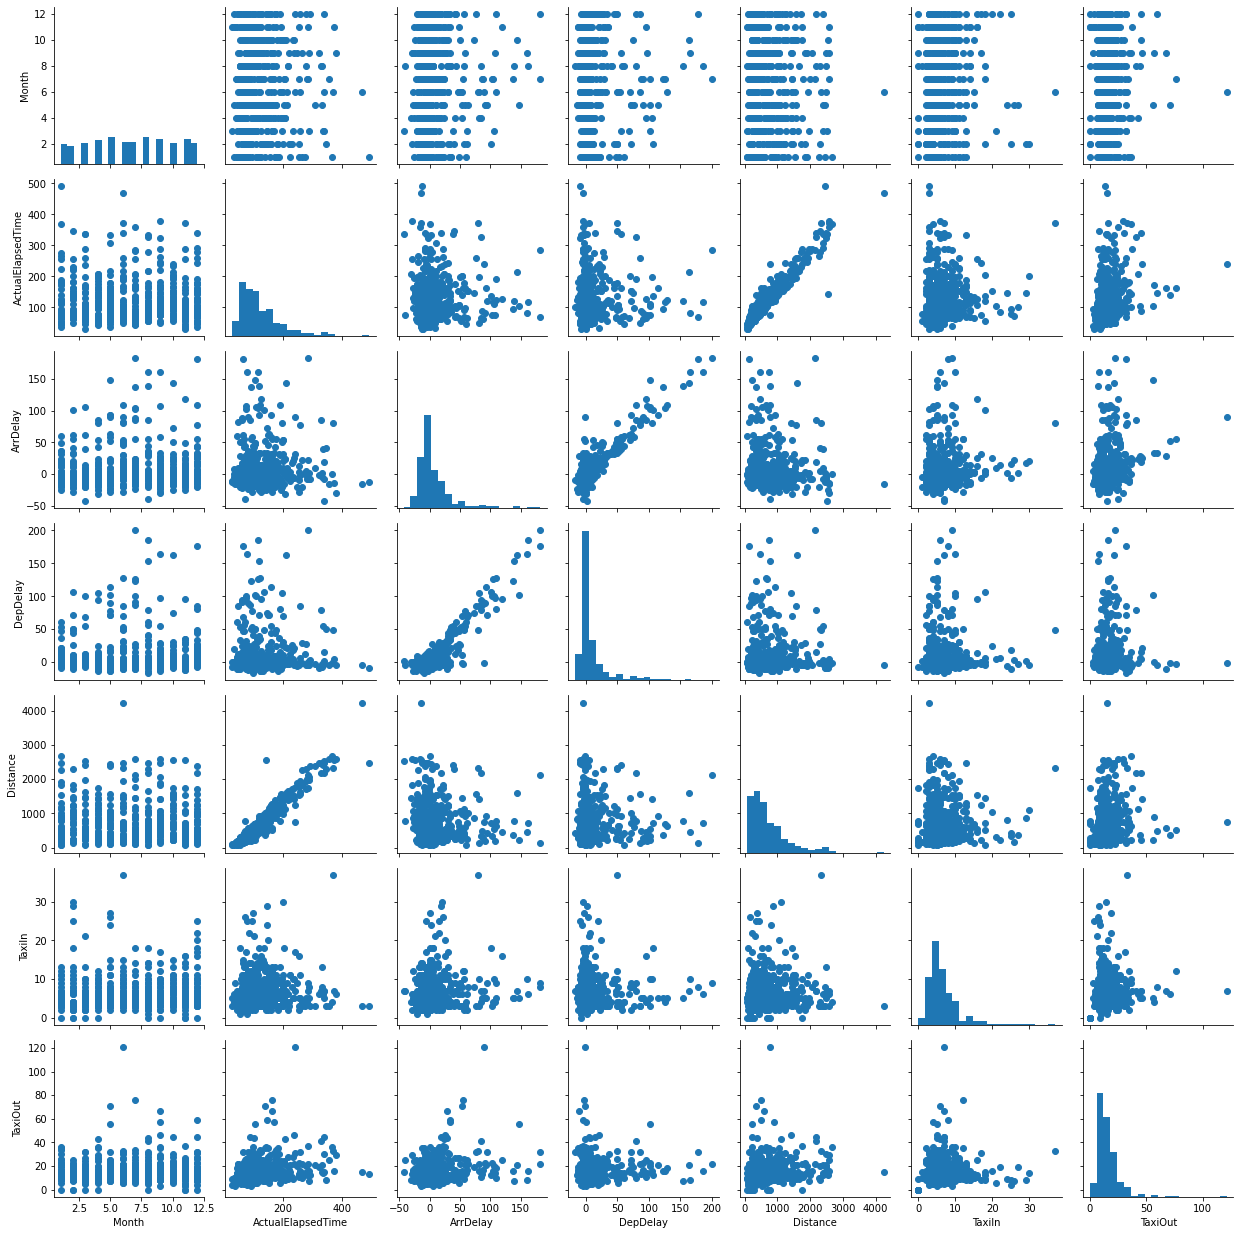

diamonds.shape= (7453215, 32)
diamonds_samp.shape= (500, 32)


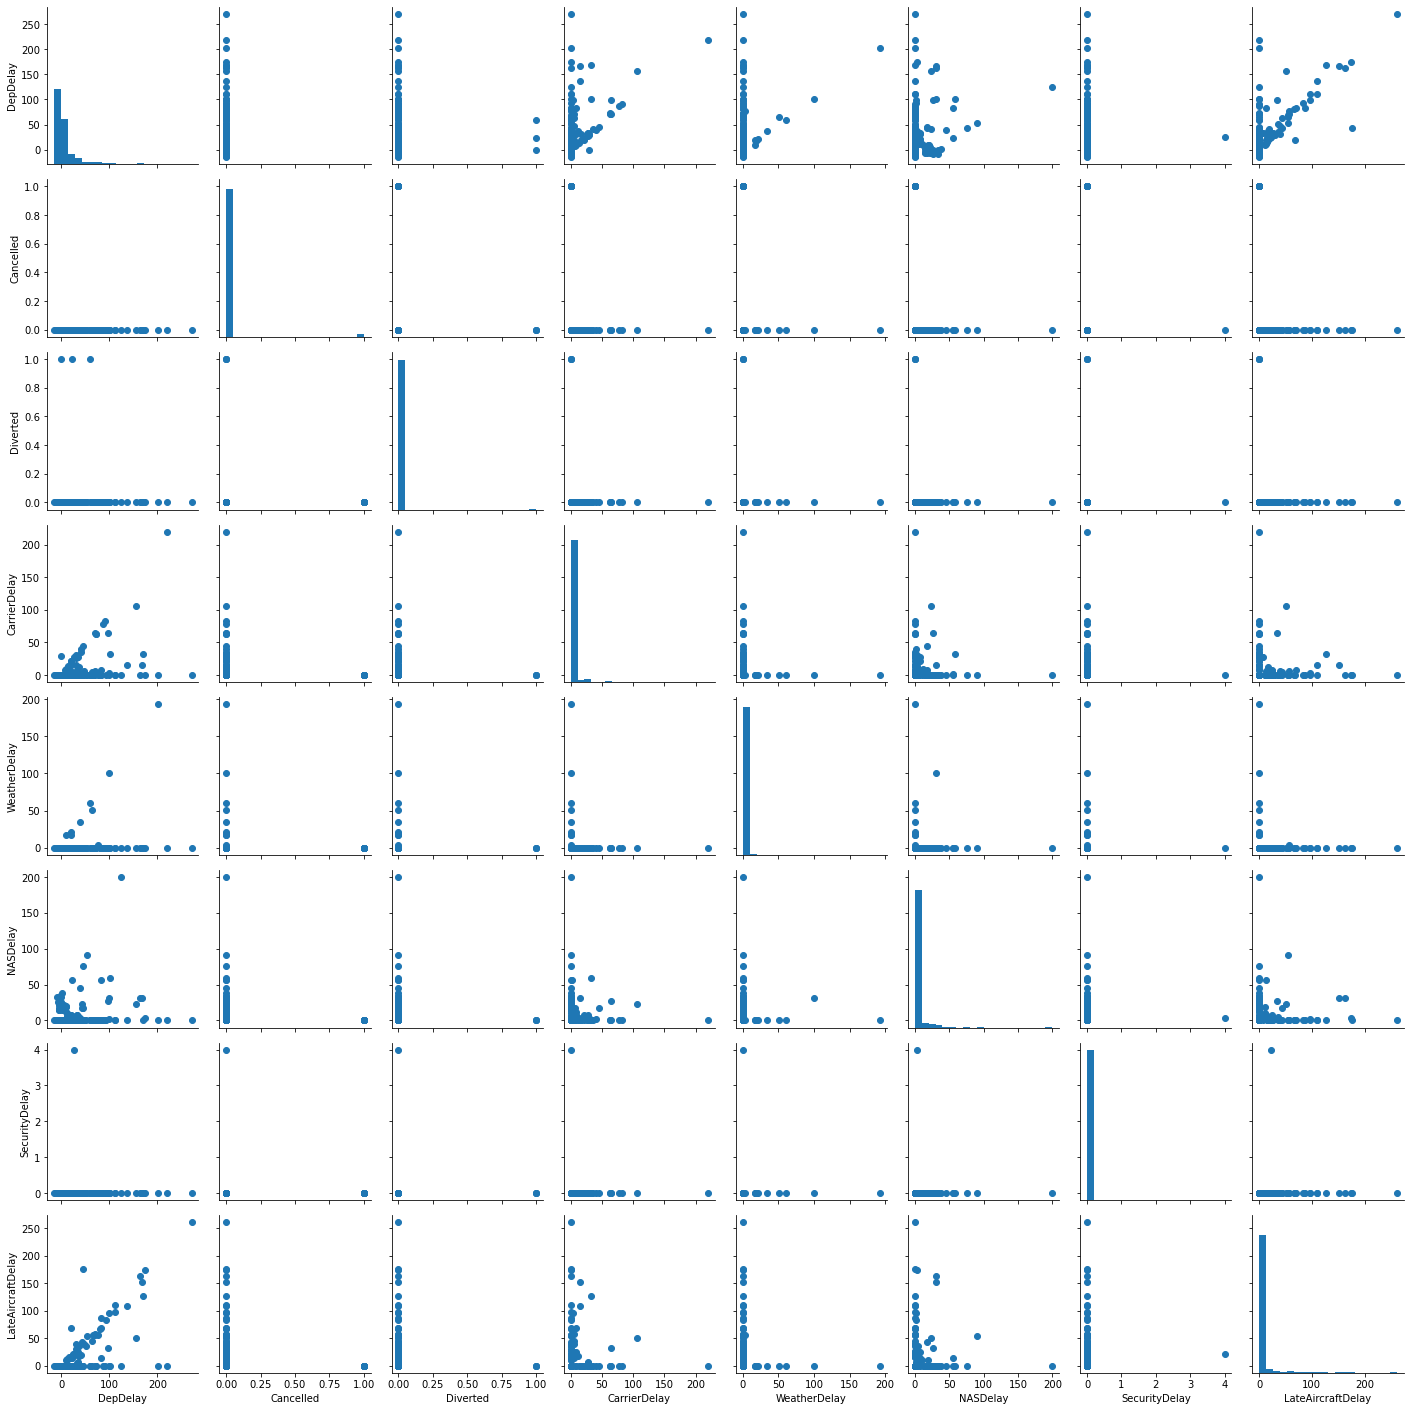

In [22]:
variables = [numeric_vars1, numeric_vars2]
for i in variables:  
    print("diamonds.shape=",df_flights_map.shape)
    df_flights_samp = df_flights_map.sample(n=500, replace = False)
    print("diamonds_samp.shape=",df_flights_samp.shape)

    g = sb.PairGrid(data = df_flights_samp, vars = i)
    g = g.map_diag(plt.hist, bins = 20);
    g.map_offdiag(plt.scatter)
    plt.show()


Observations:
+ Depart delay minutes have link with LateAircraftDelay,ArrDelay, WeatherDelay, NASDelay, CarrierDelay, TaxiIn
+ Depart delay minutes donnt have link clearly cols belows, maybe we dont have enought data or data not shown yet:SecurityDelay, Cancelled, Diverted, Distance, ActualElapsedTime
+  LateAircraftDelay, WeatherDelay, NASDelay, CarrierDelay, TaxiIn dont have correction clearly beetwen each orther 

## Analyse Delay Minutes per month

In [23]:
df_flights_month = Groupbycol(df_flights, "Month")

### Chart 9: Flights Minutes per month in 2007

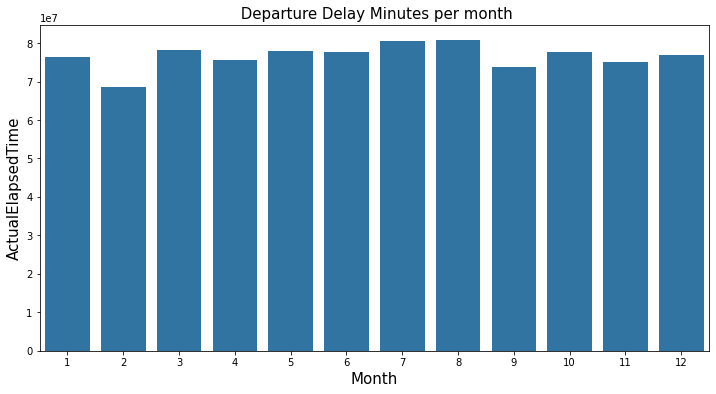

In [24]:
base_color = sb.color_palette()[0]
#create chart barplot using seaborn
fig, axes = plt.subplots(figsize=(12, 6))
plt.title(" Departure Delay Minutes per month", size=15)
#plt.text(i, count+300, count, ha = 'center', va='top')
plt.ylabel("Minutes", size=15)
plt.xlabel("Years", size=15)
axes = sb.barplot(data=df_flights_month, x="Month", y="ActualElapsedTime", color=base_color )

Observations:
Departure Delay minutes have the more late in Juin, Jully, August and December

### Chart 10: Arrival Delay Minutes per month in 2007

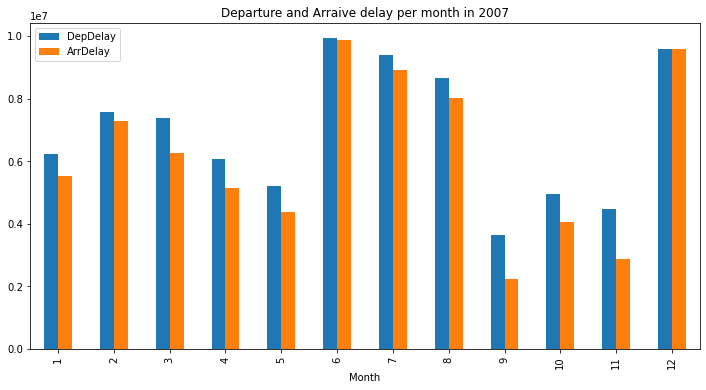

In [25]:
#Cteare chart Arrival Delay Minutes per month in 2007
df_flights_month.plot(x="Month", y=["DepDelay", "ArrDelay"], kind="bar",figsize=(12,6),  title='Departure and Arraive delay per month in 2007')
plt.show()

Observations:

Departure Delay minutes and Arrival Delay minutes have the most late in Juin 

Departure Delay minutes and Arrival Delay minutes have the least late in September

### Chart 11: Reason Delay Minutes per month in 2007

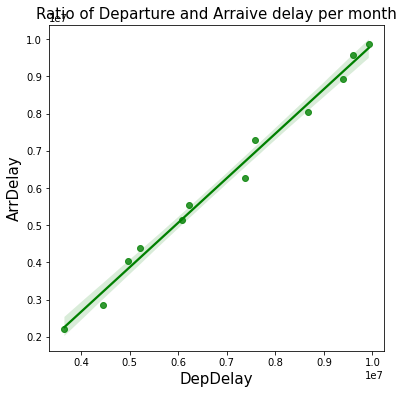

In [26]:
base_color = sb.color_palette()[0]
#create chart barplot using seaborn
fig, axes = plt.subplots(figsize=(6, 6))
plt.title("Ratio of Departure and Arraive delay per month", size=15)
#plt.text(i, count+300, count, ha = 'center', va='top')
plt.ylabel("ArrDelay", size=15)
plt.xlabel("DepDelay", size=15)
axes = sb.regplot(data=df_flights_month, x="DepDelay", y="ArrDelay", color="g")


Observations:

Departure Delay and Arrival Delay are proportional to each other 

### Chart 12: Reason Delay Minutes per month in 2007

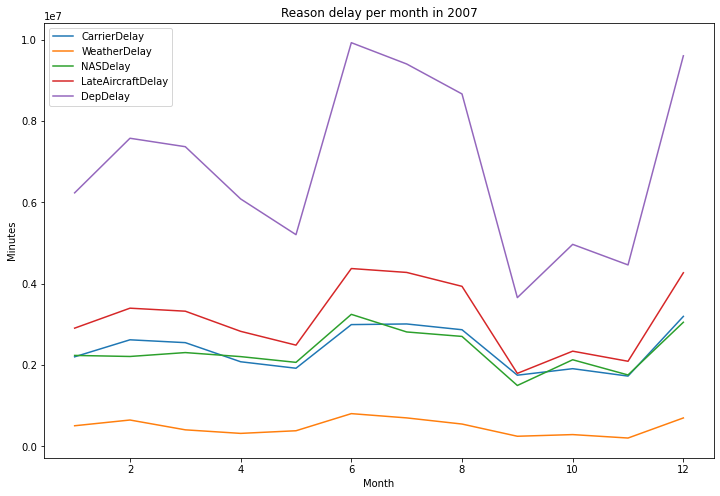

In [27]:
#Create line chart for reason delay minutes
df_reason_month = df_flights_month[["CarrierDelay","WeatherDelay","NASDelay","LateAircraftDelay","DepDelay"]]
ax=df_reason_month.plot.line( title='Reason delay per month in 2007',markersize=25, figsize=(12, 8))
ax.set_ylabel("Minutes");

Observations:

In for reason delay: LateAircraftDelay, NASDelay, WeatherDelay, CarrierDelay
+ DepDelay have link with reason delay
+ LateAircraftDelay is the most common cause 
+ WeatherDelay is the least common cause
+ NASDelay and CarrierDelay are nearly equal reason

## Analyse Delay count per Manufacturer

In [28]:
df_flights_nanufac = Groupbycol(df_flights, "Manufacturer")
df_flights_nanufac.sort_values("DepDelay", axis = 0, ascending = True, inplace = True)

### Chart 13: Flight Delay Minutes per manufacture in 2007

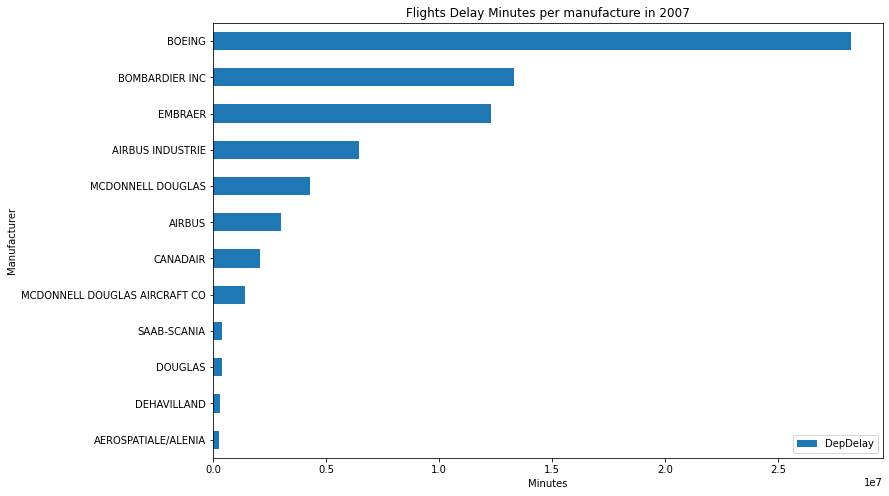

In [29]:
#Create chart Flights Minutes per manufacture in 2007
df_flights_nanufac.tail(12).plot(x="Manufacturer", y="DepDelay", kind="barh",figsize=(12,8),  title='Flights Delay Minutes per manufacture in 2007')
plt.xlabel("Minutes")
plt.show()

Observations:

In all manufacture have total flights minutes in 2007:
+ Boeing have the most total flight departure delay minutes
+ 2nd place has total flight departure delay minutes is Airbus, Embraer, Bombardier

### Chart 14: Compare Distance and Flight minutes per manufacture in 2007

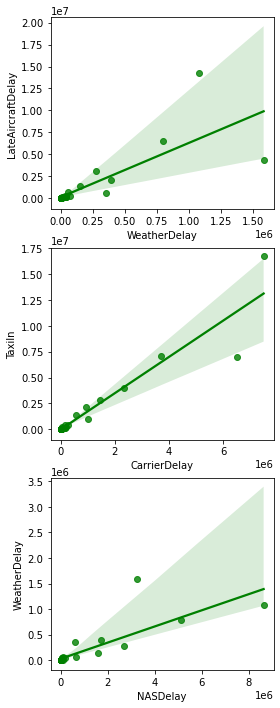

In [30]:
# scatter plot of price vs. carat, with log transform on price axis
fig, ax = plt.subplots(nrows=3, figsize = [4,12])
sb.regplot(data=df_flights_nanufac, x="WeatherDelay", y="LateAircraftDelay", color="g", ax = ax[0])
sb.regplot(data=df_flights_nanufac, x="CarrierDelay", y="TaxiIn", color="g", ax = ax[1])
sb.regplot(data=df_flights_nanufac, x="NASDelay", y="WeatherDelay", color="g", ax = ax[2])

plt.show()

Observations:

+ LateAircraftDelay,ArrDelay, WeatherDelay, NASDelay, CarrierDelay, TaxiIn dont have correlation clearly with each other

### Chart 15: Arrival Departure Delay Minutes per manufacture in 2007

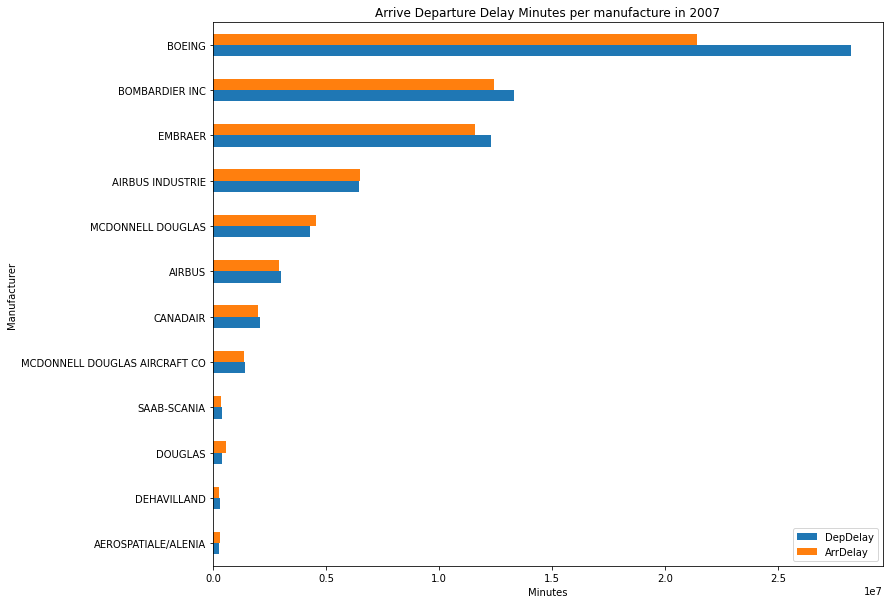

In [31]:
#Cteare chart Arrival Delay Minutes per month in 2007
df_flights_nanufac.tail(12).plot(x="Manufacturer", y=["DepDelay", "ArrDelay"], kind="barh",figsize=(12,10),  title='Arrive Departure Delay Minutes per manufacture in 2007')
plt.xlabel("Minutes")
plt.show()

Observations:

In all manufacture have departure delay and arrival delay in 2007:
+ Boeing have the most total departure delay and arrival delay minutes
+ Airbus and Airbus Industie are of Airbus, so 2nd place has total departure delay and arrival delay minutes is Airbus, Embraer and Bombardier


## Analyse Delay count per City Origin

In [32]:
df_flights_cityor = Groupbycol(df_flights, "CityOrigin")
df_flights_cityor.sort_values("DepDelay", axis = 0, ascending = True, inplace = True)

### Chart 16: Distribution DepDelay and ArrDelay per City Origin

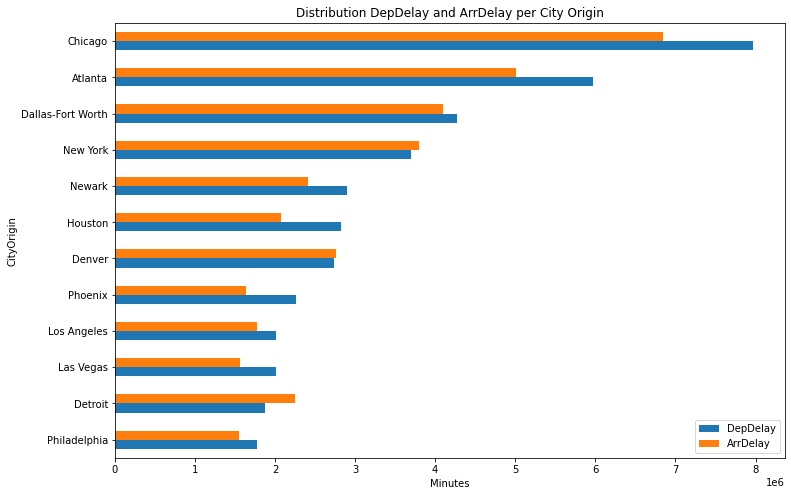

In [33]:
#Cteare chart Arrival Delay Minutes per month in 2007
df_flights_cityor.tail(12).plot(x="CityOrigin", y=["DepDelay", "ArrDelay"], kind="barh",figsize=(12,8),  title='Distribution DepDelay and ArrDelay per City Origin')
plt.xlabel("Minutes")
plt.show()


Observations:

In all City Origin have ArrDelay  and DepDelay in 2007:
+ Chicago have the most total flights delay minutes in 2007, then Atlanta


### Chart 17: Distributtion TaxiIn and TaxiOut per City Origin

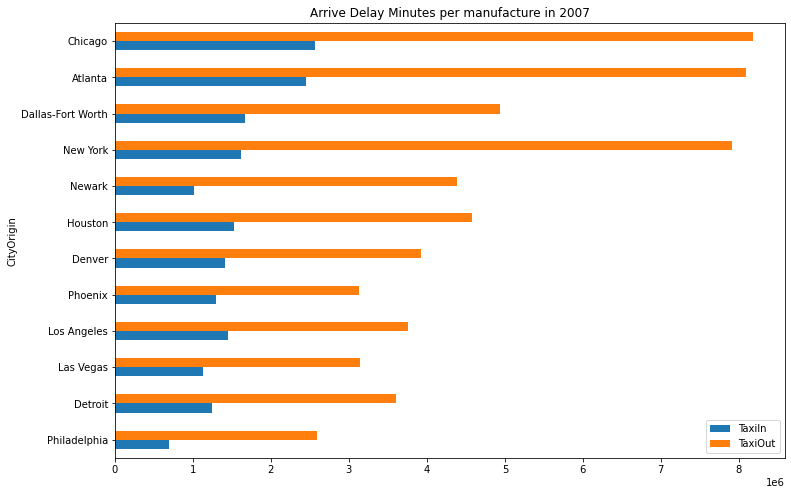

In [34]:
df_flights_cityor.tail(12).plot(x="CityOrigin", y=["TaxiIn", "TaxiOut"], kind="barh",figsize=(12,8),  title='Arrive Delay Minutes per manufacture in 2007')
plt.show()

Observations:

In all City Origin have TaxiIn and TaxiOut in 2007:
+ Chicago have the most TaxiOut and  TaxiOut in 2007, then Atlanta
+ TaxiIn minutes and TaxiOut minutes difference, TaxiOut double TaxiIn

## Analyse Delay count per State Origin

In [35]:
df_flights_stateor = Groupbycol(df_flights, "StateOrigin")
df_flights_stateor.sort_values("DepDelay", axis = 0, ascending = False, inplace = True)

### Chart 18: Distribution DepDelay and ArrDelay per State Origin

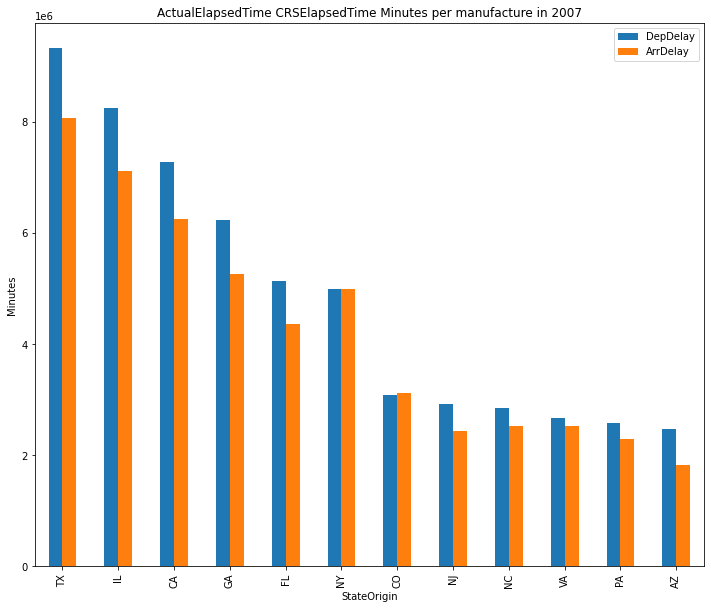

In [36]:
#Cteare chart Arrival Delay Minutes per month in 2007
df_flights_stateor.head(12).plot(x="StateOrigin", y=["DepDelay","ArrDelay"], kind="bar",figsize=(12,10),  title='ActualElapsedTime CRSElapsedTime Minutes per manufacture in 2007')
plt.ylabel("Minutes")
plt.show()

Observations:

In all rgion have ArrDelay and DepDelay in 2007:
+ TX have the most flight delay minutes in 2007, then IL

### Chart 19: Distribution Reasion deday (CarrierDelay, WeatherDelay,  NASDelay , SecurityDelay, LateAircraftDelay) and DepDelay per State Origin

Text(0, 0.5, 'Minutes')

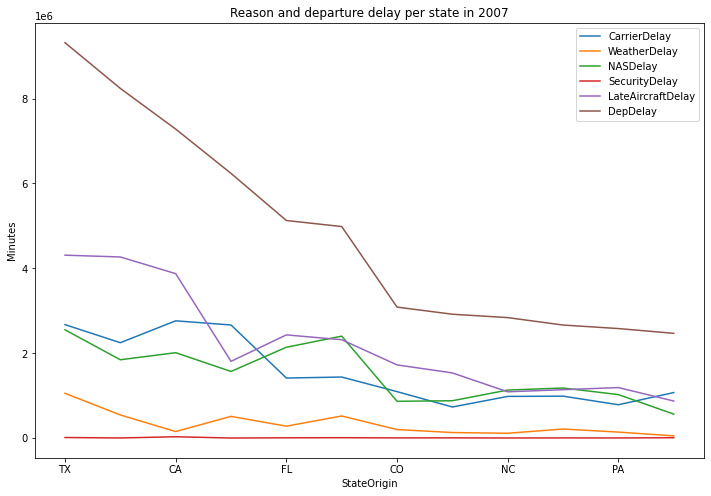

In [37]:
#Create line chart for reason delay minutes
df_reason_stateor = df_flights_stateor[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","DepDelay"]]
ax=df_reason_stateor.head(12).plot.line( title='Reason and departure delay per state in 2007',markersize=25, figsize=(12, 8))
ax.set_ylabel("Minutes")

Observations:

In all rgion have CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay in 2007:
+ SecurityDelay is the least common cause
+ LateAircraftDelay is the most common cause
+ Althought CA have the mót flight in 2007, but TX is the most WeatherDelay,NASDelay and LateAircraftDelay

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Flights Minutes variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between  250 𝑎𝑛𝑑 300 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The initial plot of the 'Year', 'Month', 'DayofMonth' features show good points. There are not any unusual distributions

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Departure delay had a surprisingly high amount of correlation with the reason delay (LateAircraftDelay, WeatherDelay, NASDelay, CarrierDelay, TaxiIn)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

LateAircraftDelay, WeatherDelay, NASDelay, CarrierDelay, TaxiIn dont have correction clearly beetwen each orther. A small negative correlation was observed between Cancelled, Diverted, Distance, ArrTime, but neither of these variables show a strong correlation with price, so they won't be explored further. There was also 2 cols StateDest and Manufacturer have link with delay minutes

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this point, LateAircraftDelay have the closest correlection with departure delay

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the reason delay

## Conclusions

+ LateAircraftDelay is the main reason of departure delay minutes.
+ Boeing have the most total departure delay minutes
+ TX state have the most total departure delay minutes
+ Chicago city have the most total departure delay minutes
